# Hamiltonian centre

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q,p) = \frac{\omega}{2}(p^2 + q^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \omega p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = -\omega q
\end{align*}

Analytical solution for initial conditions $(q_0, p_0) \in \mathbb{R}^2$


\begin{equation*}
\begin{pmatrix}
    q(\Delta t)\\
    p(\Delta t)
\end{pmatrix}
    =
    \begin{pmatrix}
        \cos \omega \Delta t & \sin \omega \Delta t \\
        -\sin \omega \Delta t & \cos \omega \Delta t
    \end{pmatrix}
    \begin{pmatrix}
        q_0\\
        p_0
    \end{pmatrix}
\end{equation*}

Here, we define the _dynamic evolution operator_ as

\begin{equation}
A_0 =
    \begin{pmatrix}
        \cos \omega \Delta t & \sin \omega \Delta t \\
        -\sin \omega \Delta t & \cos \omega \Delta t
    \end{pmatrix}
\end{equation}

which clearly depends on $\omega$ and $\Delta t$

## Simulating orbits

Take $\omega = 1$ and $\Delta t = 1$

Define domain for I.Cs : $(q_0, p_0) \in [-1,1] \times[-1,1] \subset \mathbb{R}^2$

Define original _dynamic evolution operator_ $A_0$

In [124]:
omega=1
dt=1

a_11 = numpy.cos(omega*dt)
a_12 = numpy.sin(omega*dt)
a_21 = -a_12
a_22 = a_11 

A_0 = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [125]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

In [6]:
import numpy

def dynamics(x0,omega=1,dt=1):
    a_11 = numpy.cos(omega*dt)
    a_12 = numpy.sin(omega*dt)
    a_21 = -a_12
    a_22 = a_11 
    
    A = numpy.matrix([
        [a_11, a_12],
        [a_21, a_22]
        ])
    
    x = numpy.matmul(A, x0)
    return numpy.asarray(x)

Compute trajectories for $N$ iterations for all I.C.s

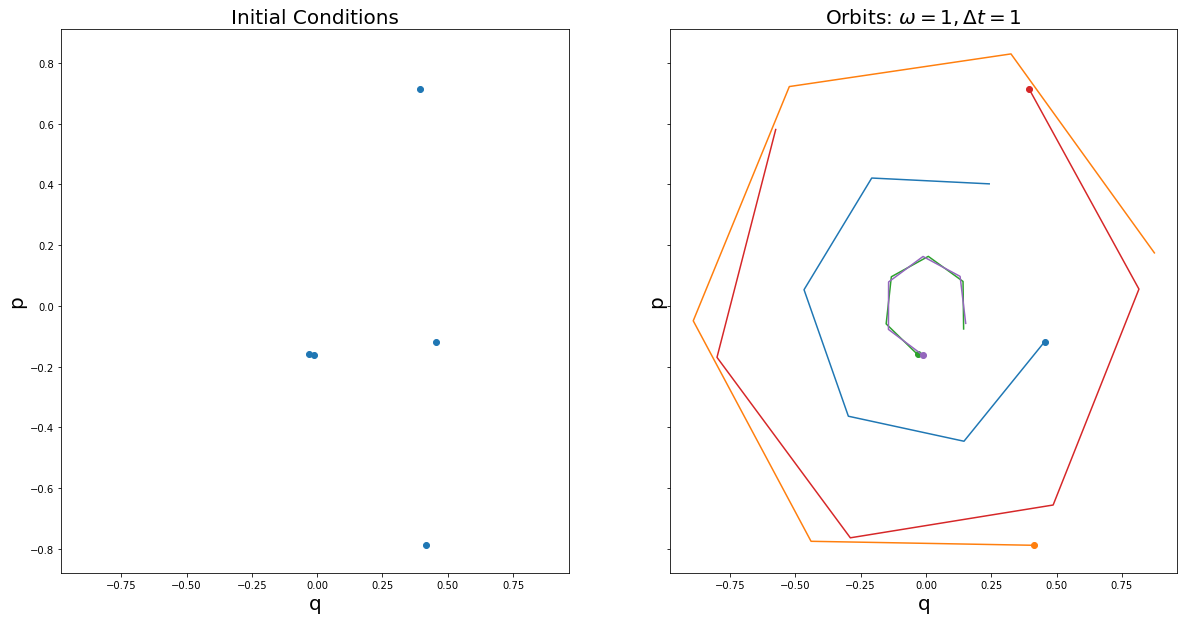

In [204]:
import matplotlib.pyplot as plt

N = 5 # number of ICs
x0 = 2*numpy.random.rand(2,N)-1 # Initial conditions
M = 5 # Number of iterations

fig,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*x0)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X  = [] # Orbits for M iterations
for n in range(M):
    X.append(x0)
    x = dynamics(x0)
    x0 = x

X.append(x0)
X = numpy.array(X).T

for n in range(N):
    x = X[n]
    q,p = numpy.array(x)
    ax[1].scatter(q[0],p[0])
    ax[1].plot(q,p)
    
ax[1].set_title("Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

## DMD application

### Construct trajectory matrices (DONE)

In [98]:
X

array([[[ 0.7833234 , -0.00619637, -0.79001923, -0.84750205,
         -0.1257954 ,  0.71156696],
        [-0.51032991, -0.93487634, -0.49990178,  0.39468017,
          0.92639499,  0.60638653]],

       [[ 0.67758163, -0.40341894, -1.113518  , -0.79985374,
          0.24919236,  1.06913215],
        [-0.91449126, -1.06426701, -0.23556058,  0.80971916,
          1.11054684,  0.39034288]],

       [[-0.61409015, -0.13509345,  0.46810755,  0.64093262,
          0.2244872 , -0.39835072],
        [ 0.23375836,  0.64303922,  0.46111279, -0.14475861,
         -0.61753962, -0.52255755]],

       ...,

       [[-0.9644046 , -0.46164824,  0.46554538,  0.96471872,
          0.57693412, -0.34128105],
        [ 0.07061656,  0.84967278,  0.84754376,  0.06618692,
         -0.77602187, -0.90475973]],

       [[-0.1291371 , -0.57346573, -0.49055261,  0.04337232,
          0.53742093,  0.53736722],
        [-0.59858588, -0.21475221,  0.36652365,  0.61081936,
          0.29353056, -0.29362888]],

       

In [58]:
# Reshape data matrix
D = 2
Y = X.reshape((D*N,M+1))

In [92]:
Y

array([[ 0.7833234 , -0.00619637, -0.79001923, -0.84750205, -0.1257954 ,
         0.71156696],
       [-0.51032991, -0.93487634, -0.49990178,  0.39468017,  0.92639499,
         0.60638653],
       [ 0.67758163, -0.40341894, -1.113518  , -0.79985374,  0.24919236,
         1.06913215],
       ...,
       [-0.59858588, -0.21475221,  0.36652365,  0.61081936,  0.29353056,
        -0.29362888],
       [ 0.29999278, -0.55281155, -0.89736348, -0.41688357,  0.44687717,
         0.89978111],
       [-0.84958168, -0.71146616,  0.08076807,  0.79874451,  0.78235893,
         0.04667616]])

Pairs of rows of this matrix represent

\begin{equation}
\left\{
\left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \, 
A \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \, 
A^2 \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \ldots ,
A^n \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right)
\right\},
\end{equation}

In [95]:
Y_back = Y[:].T[:M].T
Y_forth = Y[:].T[1:M+1].T

Then, the matrix below represents $D_0^{n-1}$ 

In [96]:
Y_back

array([[ 0.7833234 , -0.00619637, -0.79001923, -0.84750205, -0.1257954 ],
       [-0.51032991, -0.93487634, -0.49990178,  0.39468017,  0.92639499],
       [ 0.67758163, -0.40341894, -1.113518  , -0.79985374,  0.24919236],
       ...,
       [-0.59858588, -0.21475221,  0.36652365,  0.61081936,  0.29353056],
       [ 0.29999278, -0.55281155, -0.89736348, -0.41688357,  0.44687717],
       [-0.84958168, -0.71146616,  0.08076807,  0.79874451,  0.78235893]])

And the matrix below represents $D_1^{n}$ 

In [97]:
Y_forth

array([[-0.00619637, -0.79001923, -0.84750205, -0.1257954 ,  0.71156696],
       [-0.93487634, -0.49990178,  0.39468017,  0.92639499,  0.60638653],
       [-0.40341894, -1.113518  , -0.79985374,  0.24919236,  1.06913215],
       ...,
       [-0.21475221,  0.36652365,  0.61081936,  0.29353056, -0.29362888],
       [-0.55281155, -0.89736348, -0.41688357,  0.44687717,  0.89978111],
       [-0.71146616,  0.08076807,  0.79874451,  0.78235893,  0.04667616]])

__TEST__ Show that $D_1^n = A_0 D_0^{n-1}$

Below, we show how the _dynamic evolution operator_ ($A_0$) maps the rows of $D_0^{n-1}$ to the rows of $D_1^n$.

In [200]:
numpy.dot(A_0, Y_back[:2,:])

matrix([[-0.00619637, -0.79001923, -0.84750205, -0.1257954 ,  0.71156696],
        [-0.93487634, -0.49990178,  0.39468017,  0.92639499,  0.60638653]])

In [201]:
numpy.allclose(Y_forth[:2,:], numpy.dot(A_0, Y_back[:2,:]))

True

### SVD of back snapshots matrix

Compute SVD of $D_0^{n-1}$ to obtain 

\begin{equation}
    D_0^{n-1}= U \Sigma V^T
\end{equation}

In [161]:
U, S, Vh = numpy.linalg.svd(Y_back, full_matrices=True)
U.shape, S.shape, Vh.shape

((400, 400), (5,), (5, 5))

__NOTE__

SVD computation is performed using the _LAPACK_ routine. See details in documentation
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [117]:
U

array([[-4.23782139e-02,  6.69723642e-02, -8.04863377e-01, ...,
         1.01159893e-02,  6.09991243e-03, -9.41613771e-03],
       [ 6.69723642e-02,  4.23782139e-02,  2.23157975e-01, ...,
         1.08069513e-02, -3.17831673e-02,  1.59865977e-03],
       [-1.99691966e-02,  9.43963517e-02,  4.36465889e-01, ...,
         2.18301763e-02, -4.44830504e-02,  4.79366157e-02],
       ...,
       [ 4.15856562e-02, -3.10713396e-02, -5.26993078e-03, ...,
         9.97657942e-01,  2.15777650e-03, -2.81037435e-03],
       [ 6.84695796e-03,  7.60722677e-02,  3.10094524e-02, ...,
         1.98389792e-03,  9.93890891e-01,  4.10690259e-04],
       [ 7.60722677e-02, -6.84695796e-03, -3.35116846e-02, ...,
        -3.59052891e-03,  2.28775008e-03,  9.94102888e-01]])

Check if matrices a identical within numeric accuracy

In [115]:
numpy.allclose(Y_back, numpy.dot(U[:, :5] * S, Vh))

True

The above shows the reconstruction of $D_0^{n-1}$ from its SVD matrices.

__NOTE__ See documenation for details of algorithm for element-wise comparison of matrices
https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html 

### Compute Pseudo-inverse of snapshots matrix (DONE)

Original snapshot matrix $Y = D_0^{n-1}$

In [206]:
Y_back

array([[ 0.7833234 , -0.00619637, -0.79001923, -0.84750205, -0.1257954 ],
       [-0.51032991, -0.93487634, -0.49990178,  0.39468017,  0.92639499],
       [ 0.67758163, -0.40341894, -1.113518  , -0.79985374,  0.24919236],
       ...,
       [-0.59858588, -0.21475221,  0.36652365,  0.61081936,  0.29353056],
       [ 0.29999278, -0.55281155, -0.89736348, -0.41688357,  0.44687717],
       [-0.84958168, -0.71146616,  0.08076807,  0.79874451,  0.78235893]])

Moore-Penrose pseudo-inverse $Y^+$

In [209]:
Y_back_pinv = numpy.linalg.pinv(Y_back)

In [210]:
Y_back_pinv

array([[ 0.00228818, -0.00090717,  0.0022267 , ..., -0.00161212,
         0.00121843, -0.00203535],
       [-0.00060447, -0.00256188, -0.00177595, ..., -0.00022903,
        -0.00196427, -0.00160525],
       [-0.00294137, -0.00186121, -0.0041458 , ...,  0.00136463,
        -0.00334103,  0.00030071],
       [-0.00257399,  0.00055065, -0.00270402, ...,  0.00170365,
        -0.00164606,  0.0019302 ],
       [ 0.0001599 ,  0.00245625,  0.00122383, ...,  0.00047635,
         0.00156229,  0.00178507]])

In [233]:
Y_back_pinv.shape

(5, 400)

__TEST__: Verify $Y = Y Y^+ Y$

In [215]:
# Verify the above property
numpy.allclose(Y_back, numpy.dot(Y_back, numpy.dot(Y_back_pinv, Y_back)))

True

__TEST__: Verify that $ (Y' Y^+) Y = A_1 Y \approx Y' = A_0 Y$

In [294]:
A_1 = numpy.dot(Y_forth, Y_back_pinv)
A_1

array([[ 3.39375256e-03,  5.28545645e-03,  6.11380542e-03, ...,
        -8.40948116e-04,  5.69452673e-03,  2.05332314e-03],
       [-5.28545645e-03,  3.39375256e-03, -4.59303129e-03, ...,
         4.02732923e-03, -2.05332314e-03,  5.69452673e-03],
       [ 1.63219075e-03,  7.47064298e-03,  5.02991192e-03, ...,
         7.47713442e-04,  5.62815275e-03,  4.75751684e-03],
       ...,
       [-3.31208221e-03, -2.44063228e-03, -4.81451838e-03, ...,
         1.45600392e-03, -3.96427603e-03,  7.48397188e-05],
       [-5.02677842e-04,  6.03250243e-03,  1.98385985e-03, ...,
         1.71777249e-03,  3.15205382e-03,  4.90903296e-03],
       [-6.03250243e-03, -5.02677842e-04, -7.09749040e-03, ...,
         3.57356168e-03, -4.90903296e-03,  3.15205382e-03]])

In [295]:
numpy.allclose(Y_forth, numpy.dot(A_1, Y_back))

True

__NOTE__ $A_1$ doesn't have a block matrix structure like $A_0$.

### SVD of Pseudo-inverse of Snapshots matrix (DONE)

In [255]:
V, S_pinv, Uh = numpy.linalg.svd(Y_back_pinv, full_matrices=True)
Y_back_pinv.shape, V.shape, S_pinv.shape, Uh.shape

((5, 400), (5, 5), (5,), (400, 400))

__TEST__: Verify $Y^+ = V \Sigma^+ U^T$

In [239]:
numpy.allclose(Y_back_pinv, numpy.linalg.multi_dot([V, numpy.diag(S_pinv), Uh[:5]]))

True

__NOTE__ To reconstruct the PS of $Y$, only the first 5 columns  of $U$ (out of 400) were used. 

### Truncate decomposition matrices (DONE)

Since some of the singular values of $\Sigma$ will be zero. We can further truncate all the decomposition matrices to reconstruct $Y^+$

Then, we define lower-rank matrices $U_r, \Sigma_r^+, V_r$

In [247]:
U_r = Uh[:2].T
S_pinv_r = numpy.diag(S_pinv[:2])
V_r = V[:, :2]

In [256]:
Y_back_pinv.shape, V_r.shape, S_pinv_r.shape, U_r.T.shape

((5, 400), (5, 2), (2, 2), (2, 400))

In [250]:
numpy.allclose(Y_back_pinv, numpy.linalg.multi_dot([V_r, S_pinv_r, U_r.T]))

True

### Compute _evolution operator_ from data

The data-reconstructred dynamical evolution operator $A'$ is computed by

\begin{equation}
A' =   D_1^n V \Sigma^{-1} U^T .
\end{equation}

Ultimately, the question is whether 

\begin{equation}
    A' \approx 
    \begin{pmatrix}
    A_0 & 0_{2 \times 2} & \dots & 0_{2 \times 2}\\
    0_{2 \times 2} & A_0 & \dots & 0_{2 \times 2}\\
    \vdots & \vdots & \ddots & \vdots\\
    0_{2 \times 2} & 0_{2 \times 2} & \dots & A_0
    \end{pmatrix}
\end{equation}

\begin{equation*}
    \mathbf{A} = \mathbf{Y} \mathbf{V}_r \mathbf{\Sigma}_{r}^{-1} \mathbf{U}_{r}^{*}
\end{equation*}

this matrix has a block structure.

In [260]:
Y_forth.shape, V_r.shape, numpy.linalg.inv(S_pinv_r).shape, U_r.T.shape

((400, 5), (5, 2), (2, 2), (2, 400))

Compute original and DMD _dynamical evolution operator_

In [263]:
A_dmd = numpy.linalg.multi_dot([Y_forth, V_r, numpy.linalg.inv(S_pinv_r), U_r.T])

In [264]:
A_dmd

array([[ 0.68668441,  1.77494338,  1.53615393, ..., -0.00523372,
         1.56581534,  0.95510755],
       [-1.90242015,  1.67452355, -1.46114227, ...,  1.55547139,
        -0.47349481,  2.39615939],
       [-0.02289083,  2.73551663,  1.13361864, ...,  0.6534805 ,
         1.58618892,  2.10585119],
       ...,
       [-0.86488118, -0.69457513, -1.28148468, ...,  0.36682072,
        -1.06875373, -0.02425218],
       [-0.59004142,  2.33936726,  0.31842805, ...,  0.90789277,
         0.9201254 ,  2.13532391],
       [-1.85775452,  0.24030263, -2.01821752, ...,  1.1928681 ,
        -1.28014246,  1.27292033]])

In [265]:
numpy.dot(A_dmd, Y_back)

array([[ -58.57321877, -264.85459999, -227.62988342,   18.8766982 ,
         248.02813055],
       [-373.29900652, -247.3542846 ,  106.00682585,  361.90574949,
         285.07019606],
       [-225.10738319, -407.12342059, -214.83206265,  174.97490294,
         403.91074971],
       ...,
       [ -51.42626597,  104.23165571,  164.05947382,   73.0517683 ,
         -85.1193961 ],
       [-263.65018508, -347.60225892, -111.97041895,  226.60650782,
         356.84245635],
       [-251.20256491,  -33.93325286,  214.53413537,  265.75982892,
          72.64716137]])

In [266]:
Y_forth

array([[-0.00619637, -0.79001923, -0.84750205, -0.1257954 ,  0.71156696],
       [-0.93487634, -0.49990178,  0.39468017,  0.92639499,  0.60638653],
       [-0.40341894, -1.113518  , -0.79985374,  0.24919236,  1.06913215],
       ...,
       [-0.21475221,  0.36652365,  0.61081936,  0.29353056, -0.29362888],
       [-0.55281155, -0.89736348, -0.41688357,  0.44687717,  0.89978111],
       [-0.71146616,  0.08076807,  0.79874451,  0.78235893,  0.04667616]])

__NOTE__ The last 3 entries of in the diagonal of $\Sigma$, given by `S` are close to zero, hence, we remove them as these lead to singularities in the inverse matrix. 

In [162]:
S

array([2.06679021e+01, 1.63886907e+01, 4.86893289e-15, 2.39682935e-15,
       1.78632986e-15])

In [163]:
# Re-define S diagonal matrix
S = S[:2]
# Compute inverse

In [168]:
S_inv = numpy.diag([x for x in S]+[0,0,0])
S_inv

array([[20.66790213,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 16.38869073,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [169]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

In [171]:
Y_forth.shape, Vh.T.shape, S_inv.shape, U[:, :5].T.shape

((400, 5), (5, 5), (5, 5), (5, 400))

In [174]:
A_dmd = numpy.linalg.multi_dot([Y_forth, Vh.T, S_inv, U[:, :5].T])

In [175]:
A_dmd

array([[ 0.68668441,  1.77494338,  1.53615393, ..., -0.00523372,
         1.56581534,  0.95510755],
       [-1.90242015,  1.67452355, -1.46114227, ...,  1.55547139,
        -0.47349481,  2.39615939],
       [-0.02289083,  2.73551663,  1.13361864, ...,  0.6534805 ,
         1.58618892,  2.10585119],
       ...,
       [-0.86488118, -0.69457513, -1.28148468, ...,  0.36682072,
        -1.06875373, -0.02425218],
       [-0.59004142,  2.33936726,  0.31842805, ...,  0.90789277,
         0.9201254 ,  2.13532391],
       [-1.85775452,  0.24030263, -2.01821752, ...,  1.1928681 ,
        -1.28014246,  1.27292033]])

In [205]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

### Compare with original operator

In [179]:
Y_forth

array([[-0.00619637, -0.79001923, -0.84750205, -0.1257954 ,  0.71156696],
       [-0.93487634, -0.49990178,  0.39468017,  0.92639499,  0.60638653],
       [-0.40341894, -1.113518  , -0.79985374,  0.24919236,  1.06913215],
       ...,
       [-0.21475221,  0.36652365,  0.61081936,  0.29353056, -0.29362888],
       [-0.55281155, -0.89736348, -0.41688357,  0.44687717,  0.89978111],
       [-0.71146616,  0.08076807,  0.79874451,  0.78235893,  0.04667616]])

In [183]:
Y_forth.shape

(400, 5)

Compute 

\begin{equation}
    A_{DMD} D_0^{n-1}
\end{equation}

Then, compare with $D_{1}^n$, that is,

\begin{equation}
    A_{DMD} D_0^{n-1} - D_{1}^n \approx 0 \quad \text{?}
\end{equation}

In [184]:
numpy.dot(A_dmd, Y_back)

array([[ -58.57321877, -264.85459999, -227.62988342,   18.8766982 ,
         248.02813055],
       [-373.29900652, -247.3542846 ,  106.00682585,  361.90574949,
         285.07019606],
       [-225.10738319, -407.12342059, -214.83206265,  174.97490294,
         403.91074971],
       ...,
       [ -51.42626597,  104.23165571,  164.05947382,   73.0517683 ,
         -85.1193961 ],
       [-263.65018508, -347.60225892, -111.97041895,  226.60650782,
         356.84245635],
       [-251.20256491,  -33.93325286,  214.53413537,  265.75982892,
          72.64716137]])

In [182]:
numpy.dot(A_dmd, Y_back).shape

(400, 5)

In [176]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

In [ ]:
#numpy.allclose(A_0, A_dmd)

# Hamiltonian saddle

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q,p) = \frac{\lambda}{2}(p^2 - q^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \lambda p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = \lambda q
\end{align*}

Analytical solution for initial conditions $(q_0, p_0) \in \mathbb{R}^2$


\begin{equation*}
\begin{pmatrix}
    q(\Delta t)\\
    p(\Delta t)
\end{pmatrix}
    =
    \begin{pmatrix}
        \cosh \lambda \Delta t & \sinh \lambda \Delta t \\
        \sinh \lambda \Delta t & \cosh \lambda \Delta t
    \end{pmatrix}
    \begin{pmatrix}
        q_0\\
        p_0
    \end{pmatrix}
\end{equation*}

## Simulating orbits

Take $\lambda = 1$ and $\Delta t = 1$

Define domain for I.Cs : $(q_0, p_0) \in [-1,1] \times[-1,1] \subset \mathbb{R}^2$

In [4]:
import numpy

def dynamics(x0,l=1,dt=0.1):
    a_11 = numpy.cosh(l*dt)
    a_12 = numpy.sinh(l*dt)
    a_21 = a_12
    a_22 = a_11 
    
    A = numpy.matrix([
        [a_11, a_12],
        [a_21, a_22]
        ])
    
    x = numpy.matmul(A, x0)
    return numpy.asarray(x)

Compute trajectories for $N$ iterations for all I.C.s

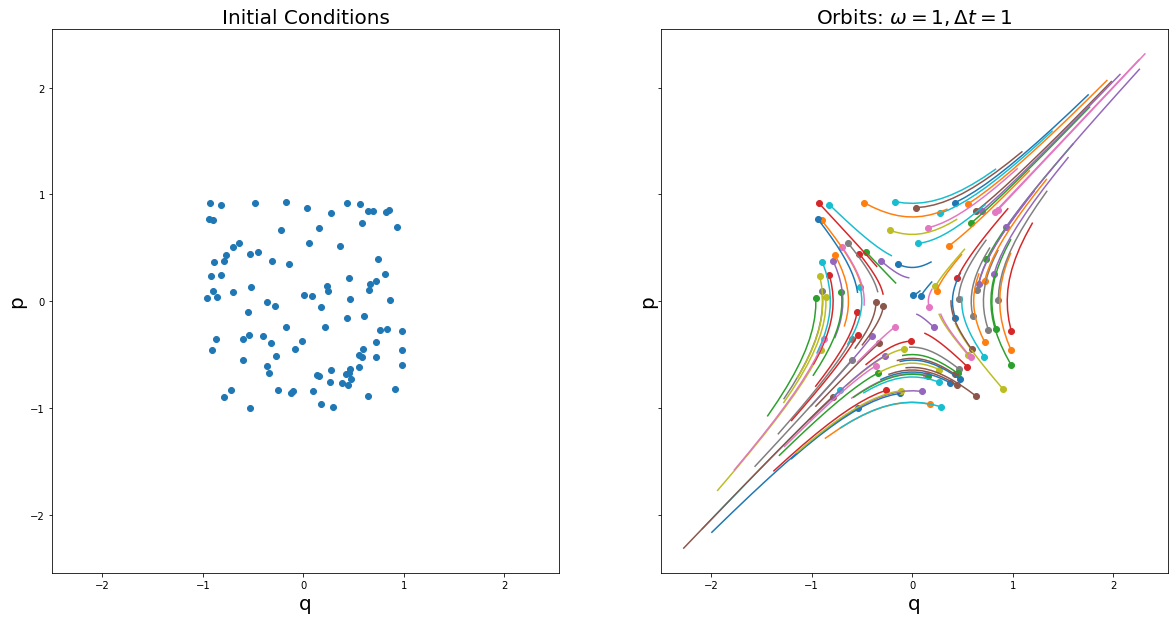

In [5]:
import matplotlib.pyplot as plt

N = 100 # number of ICs
x0 = 2*numpy.random.rand(2,N)-1 # Initial conditions
M = 10

fig,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*x0)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X  = [] # Orbits for M iterations
for n in range(M):
    X.append(x0)
    x = dynamics(x0)
    x0 = x

X.append(x0)
X = numpy.array(X).T

for n in range(N):
    x = X[n]
    q,p = numpy.array(x)
    ax[1].scatter(q[0],p[0])
    ax[1].plot(q,p)
    
ax[1].set_title("Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

# Hamiltonian saddle-centre

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q_1,p_1,q_2,p_2) = \underbrace{H_1}_\text{reaction} + \underbrace{H_2}_\text{bath}
\end{equation}

\begin{equation}
    H_1(q_1,p_1) = \frac{\lambda}{2}(p_1^2 - q_2^2)\\
    H_2(q_2,p_2) = \frac{\omega}{2}(p_2^2 + q_2^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \lambda p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = \lambda q
\end{align*}

## Simulating orbits (NOT READY)